# ***PCA Visualization***

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique used in various fields such as data visualization, machine learning, and data analysis. In this tutorial, we will walk through the process of generating synthetic data, preprocessing it, applying PCA, and visualizing the results using a Jupyter Notebook. By the end of this tutorial, you will have a clear understanding of how to use PCA to reduce the dimensionality of data for visualization purposes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Generating Synthetic Data**




In [ ]:
# Set a random seed for reproducibility
np.random.seed(0)

# Number of data points
n_samples = 1000

# Define the mean and covariance matrix for a 3D dataset
mean = [0, 0]
cov = [[13, -3], [-3, 5]]

# Generate synthetic 3D data
data = np.random.multivariate_normal(mean, cov, n_samples)


In [ ]:
#creating dataframe for our synthetic data
df=pd.DataFrame(data,columns=["x0","x1"])
df.head()

,x0,x1
0,-6.008683,2.846500
1,-2.056910,5.409854
2,-7.247258,0.355470
3,-3.468206,0.836980
4,0.626076,0.656926


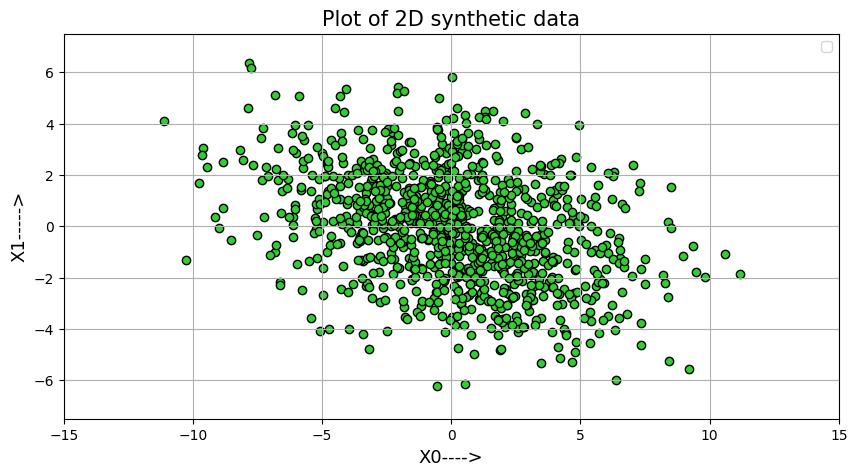

In [ ]:
#visualising my synthetic data
plt.figure(1,figsize=(10,5))
plt.scatter(df["x0"],df["x1"],color="limegreen",edgecolors="black")
plt.title('Plot of 2D synthetic data',fontsize=15) #title
plt.xlabel("X0---->",fontsize=13) #x label
plt.ylabel("X1----->" ,fontsize=13) #y label
plt.xlim([-15 ,15]) #x limit
plt.ylim([-7.5, 7.5]) #y limit
plt.grid()
plt.legend()
plt.show()




###Covariance Matrix For synthetic Data


In [ ]:
cov_matrix=df.cov()
print(cov_matrix)

           x0        x1
x0  12.420527 -2.754033
x1  -2.754033  4.743828


**Data Preprocessing**

Before applying PCA, it's crucial to standardize the data to have a mean of 0 and a standard deviation of 1. Standardization ensures that all features have the same scale, which is a fundamental requirement for PCA.



In [ ]:
# Standardize the data
#Till Now mean is zero but standard deviation is not 1 so we are making standard deviation as 1
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)


In [ ]:
#creating dataframe for our standardise synthetic data
df_standardize=pd.DataFrame(data_standardized,columns=["x0","x1"])
df_standardize.head()

,x0,x1
0,-1.725920,1.328013
1,-0.604058,2.505514
2,-2.077536,0.183734
3,-1.004708,0.404920
4,0.157610,0.322211


### Plotting the standardise Data
Nothing will change with respect to previous graph just variance of each column become 1

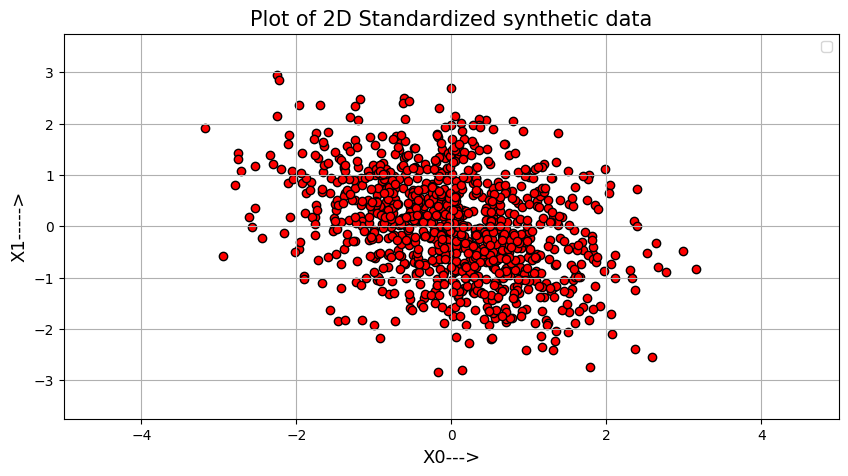

In [ ]:
plt.figure(2,figsize=(10,5))
plt.scatter(df_standardize["x0"],df_standardize["x1"],color="red",edgecolors="black")
plt.title('Plot of 2D Standardized synthetic data',fontsize=15) #title
plt.xlabel("X0--->",fontsize=13) #x label
plt.ylabel("X1----->" ,fontsize=13) #y label
plt.xlim([-5 ,5]) #x limit
plt.ylim([-3.75, 3.75]) #y limit
plt.grid()
plt.legend()
plt.show()

### Covariance Matrix For Standardize Data




In [ ]:
cov_matrix_standardise=df_standardize.cov()
print(cov_matrix_standardise)

          x0        x1
x0  1.001001 -0.359144
x1 -0.359144  1.001001


###eigen values and eigen vectors of standardized data covariance matrix

using **numpy.linalg.eig()**

###returns:
####The normalized (unit “length”) eigenvectors, such that the column  ***eigenvectors[:,i]*** is the eigenvector corresponding to the eigenvalue eigenvalues[i].

In [ ]:
eignvalues, eignvecs = np.linalg.eig(cov_matrix_standardise)

print("eigen Values",eignvalues)
print("eigen Vectors",eignvecs)

eigen Values [1.36014546 0.64185654]
eigen Vectors [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


#creating array for storing arrow locations and arrow directions for both the direction

In [ ]:
soa = np.array([[0, 0, eignvalues[0] * eignvecs[0][0], eignvalues[0] * eignvecs[1][0]]])
soa1 = np.array([[0, 0, eignvalues[1] * eignvecs[0][1], eignvalues[1] * eignvecs[1][1]]])
x0, y0, u0, v0 = zip(*soa)
x1, y1, u1, v1 = zip(*soa1)

#creating scatter plot with eigen directions

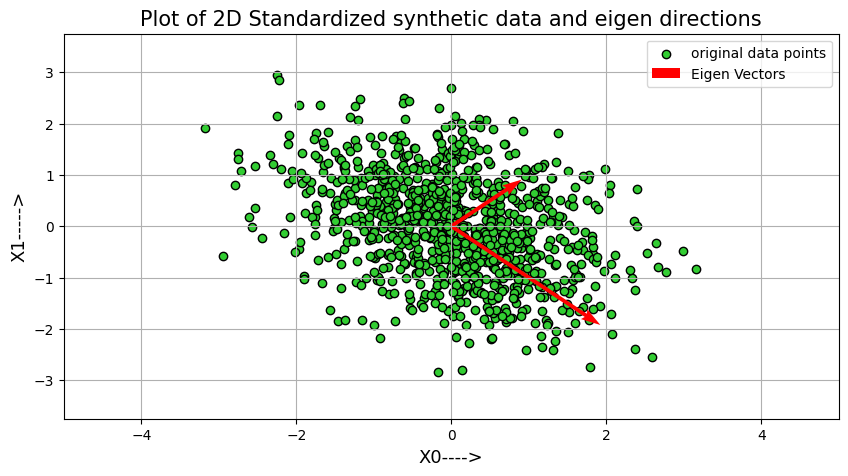

In [ ]:
plt.figure(2,figsize=(10,5))
plt.scatter(df_standardize["x0"],df_standardize["x1"],color="limegreen",edgecolors="black",label='original data points')
plt.title('Plot of 2D Standardized synthetic data and eigen directions',fontsize=15)
plt.xlabel("X0---->",fontsize=13)
plt.ylabel("X1----->" ,fontsize=13)
plt.xlim([-5 ,5])
plt.ylim([-3.75, 3.75])
#quiver is used to plot eigen directions given origin and directions
plt.quiver(x0, y0, u0, v0, angles='xy', scale_units='xy',color='red', scale=0.5, width=0.005)
plt.quiver(x1, y1, u1, v1, angles='xy', scale_units='xy',color='red', scale=0.5, width=0.005, label='Eigen Vectors')
plt.grid()
plt.legend()
plt.show()

###Note:
In the above figure you may feel the two eigen vectors direction are not orthogonal but actually they are!!
You May check it by taking the dot product for two eigen vectors.

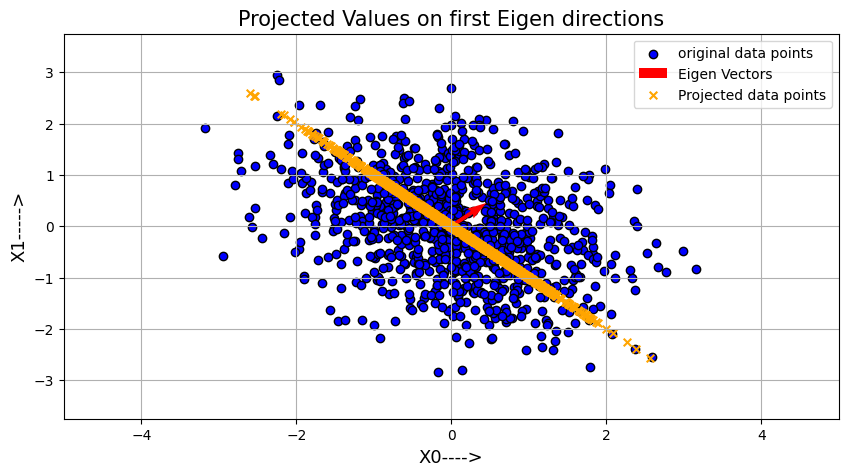

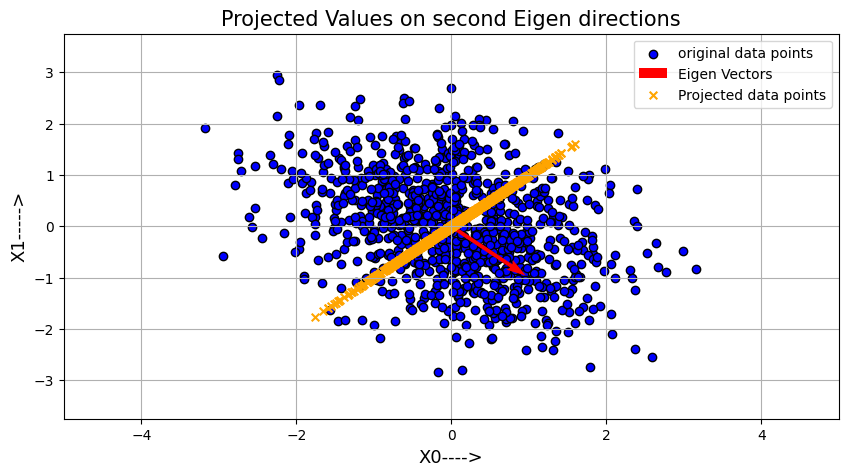

In [ ]:
# Here pc_list contains reduced 1d data obtained from each eigen vector:
pc_list = [[], []]
#running loop so that project for both the directions and plot for both directions in one go
for i in range(2):
    plt.figure(i+3,figsize=(10,5))
    #making scatter plot of synthetic data
    plt.scatter(df_standardize["x0"],df_standardize["x1"],color="blue",edgecolors="black",label='original data points')
    #plotting arrow lines or eigen directions
    plt.quiver(x0, y0, u0, v0, angles='xy', scale_units='xy',color='red', scale=1, width=0.005)
    plt.quiver(x1, y1, u1, v1, angles='xy', scale_units='xy',color='red', scale=1, width=0.005, label='Eigen Vectors')
    plt.legend() #showing legend
    # Projection of data points:
    projection_points_x = []
    projection_points_y = []
    #running loop so as to project each data vector along given eigen directions
    for q in df_standardize.index:
        p = np.dot(np.array(df_standardize.iloc[q]), np.transpose(eignvecs)[i]) / np.linalg.norm(np.transpose(eignvecs)[i])
        # Projection_points contains coordinates 1D data in 2D plane:
        projection_points_x.append(p * np.transpose(eignvecs)[i][0] / np.linalg.norm(np.transpose(eignvecs)[i]))
        projection_points_y.append(p * np.transpose(eignvecs)[i][1] / np.linalg.norm(np.transpose(eignvecs)[i]))
        pc_list[i].append(p)
    #plotting scatter plot of projected data
    plt.scatter(projection_points_x, projection_points_y, 30, marker='x', color="orange",label='Projected data points')
    plt.legend()
    plt.xlabel("X0---->",fontsize=13)
    plt.ylabel("X1----->" ,fontsize=13)
    plt.xlim([-5 ,5])
    plt.ylim([-3.75, 3.75])
    #making condition to give title differently
    if i==0:
        plt.title('Projected Values on first Eigen directions',fontsize=15)
    elif i==1:
        plt.title('Projected Values on second Eigen directions',fontsize=15)
    plt.grid()


##Plotting Synthetic data by taking principal components(eigen vectors) as our axes

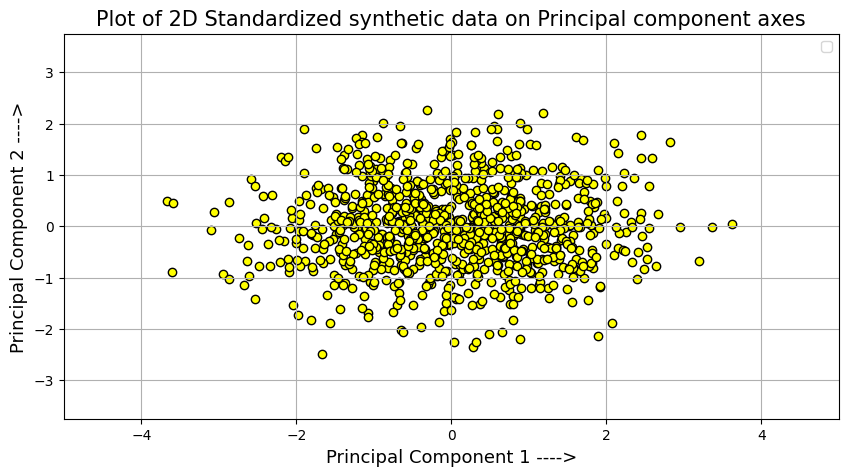

In [ ]:
plt.figure(2,figsize=(10,5))
plt.scatter(pc_list[0],pc_list[1],color="yellow",edgecolors="black")
plt.title('Plot of 2D Standardized synthetic data on Principal component axes',fontsize=15) #title
plt.xlabel("Principal Component 1 ---->",fontsize=13) #x label
plt.ylabel("Principal Component 2 ---->" ,fontsize=13) #y label
plt.xlim([-5 ,5]) #x limit
plt.ylim([-3.75, 3.75]) #y limit
plt.grid()
plt.legend()
plt.show()

##If we choose one of the axes from (X0,X1) then loss will be more as variance will be more on the other axes.
##But if you choose one of the axes from (PC1,PC2) then loss will be less as variance on other axes will be less.

